# Word Clouds Generation


This notebook is to generate positive and negative word clouds from student comments for each course.

## 1. Import Packages

In [1]:
! pip install textblob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from textblob import TextBlob
from collections import defaultdict
import nltk

from nltk.tokenize import RegexpTokenizer
# use `RegexpTokenizer` to filter out punctuations in the word clouds 
tokenizer = RegexpTokenizer(r'\w+')
%matplotlib inline

You should consider upgrading via the '/Users/qichao/opt/miniconda3/bin/python3 -m pip install --upgrade pip' command.


## 2. Import Survey Data 

Import the survey data from the correct path.

In [2]:
survey_df = pd.read_csv('EndOfCourseSurvey.csv')

/Users/qichao/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## 3. Processing Text Data 

Pre-processing the comment data from survey data for word clouds generation

### 3.1. Text Polarity

Calculate the sentiment polarity for each comment with (`TextBlob`)[https://textblob.readthedocs.io/en/dev/] library and 

In [3]:
def sent_polarity(text):
    '''Calculate the sentiment polarity of a text'''
    return TextBlob(str(text)).polarity

# add a new column in survey_df to store the comment polarity
survey_df['comment_polarity'] = survey_df['Response_Q5'].apply(sent_polarity)

Classify the comments by negative (polarity < 0) and positive (polarity > 0) and ignore the neutral comments (polarity = 0)

In [4]:
neg_comment = defaultdict(list)
pos_comment = defaultdict(list)

In [5]:
neg_survey_df =  survey_df[survey_df["comment_polarity"] < 0]

for i in range(neg_survey_df.shape[0]):
    CourseName = neg_survey_df.iloc[i]["CourseName"]
    comment = neg_survey_df.iloc[i]["Response_Q5"]
    neg_comment[CourseName].append(comment)

In [6]:
pos_survey_df =  survey_df[survey_df["comment_polarity"] > 0]

for i in range(pos_survey_df.shape[0]):
    CourseName = pos_survey_df.iloc[i]["CourseName"]
    comment = pos_survey_df.iloc[i]["Response_Q5"]
    pos_comment[CourseName].append(comment)

### 3.2. Inspect the polarity distribution 

In [7]:
len(neg_comment.keys())
# 132 - 123 = 9 courses don't have negative comments

123

In [8]:
len(pos_comment.keys())
# 132 - 125 = 7 courses don't have positive comments

125

In [9]:
set(neg_comment.keys()) - set(pos_comment.keys())
# The course only has negative comment

{'Advanced Futures & Forwards'}

In [10]:
set(pos_comment.keys()) - set(neg_comment.keys())
# These courses only have positive comment

{'Applied Technical Analysis for Equity Markets',
 'Case Study - RockCrusher Rentals',
 'Financial Modeling using VBA'}

In [11]:
CourseName = {x for x in survey_df['CourseName'].unique() if str(x) != 'nan'}

In [12]:
CourseName - (set(pos_comment.keys()) & set(neg_comment.keys()))
# These courses have neither positive comments nor positive comments

{'Advanced Futures & Forwards',
 'Advanced Power BI',
 'Advanced Tableau - LOD Calculations',
 'Applied Technical Analysis for Equity Markets',
 'Case Study - RockCrusher Rentals',
 'Cryptocurrency Intermediates: Bitcoin Explained',
 'ESG for Commercial Lenders',
 'Financial Modeling using VBA',
 'Problem Loans',
 'Vertical IQ Fundamentals'}

## 4. Generate word could

### 4.1. Define Stopwords

These stopwords will be filter out from the word clouds.

In [13]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords.update(["course", "courses", "topic", "section", "good", "great", 
                  "goodgood", "file", "content", "thank", "work", "learning", "VBA", 
                  "follow", "bit", "lot", "make", "use", "without", "think",
                 "little", "learn", "feel", "first", "excel", "need", "much",
                 "working", "provided", "thanks", "finance", "better", "excellent",
                 "instructor", "model", "formula", "question", "questions",
                 "ESG", "example", "material", "please", "certificate", "disclosure"])

### 4.2. Extract Nouns and Adjectives

Because Nouns and Adjectives are the most informative words in language, we are extracting these work to make the word clouds look better. We can also use `tf-idf` and extract None Phrases to further improve the word clouds.

In [14]:
def word_cloud(CourseName):
    '''generate the positive and negative word cloud for a course'''

    print ("Negative Comments: {}".format(len(neg_comment[CourseName])))
    if len(neg_comment[CourseName]) != 0:
        sentences = []
        for comment in neg_comment[CourseName]:
            sentences.extend(nltk.sent_tokenize(comment)) 
        n_adj = '' # str to hold all nouns and adjectives
        for sentence in sentences:
             for word, pos in nltk.pos_tag(nltk.word_tokenize(sentence)):
                if pos.startswith('NN') or pos.startswith('JJ'):
                    n_adj += word
                    n_adj += ' '
        wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=50, background_color="black").generate(n_adj)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()
            
    #text = tokenizer.tokenize(pos_comment[CourseName])
    print ("Positive Comments: {}".format(len(pos_comment[CourseName])))
    if len(pos_comment[CourseName]) != 0:
        sentences = []
        for comment in pos_comment[CourseName]:
            sentences.extend(nltk.sent_tokenize(comment)) 
        n_adj = '' # str to hold all nouns and adjectives
        for sentence in sentences:
             for word, pos in nltk.pos_tag(nltk.word_tokenize(sentence)):
                if pos.startswith('NN') or pos.startswith('JJ'):
                    n_adj += word
                    n_adj += ' '
        wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=50, background_color="white").generate(n_adj)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

### 4.3. Generate word clouds for two outlier courses

Negative Comments: 93


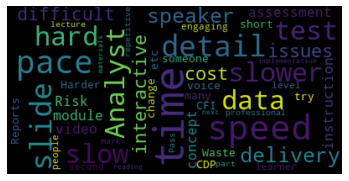

Positive Comments: 2195


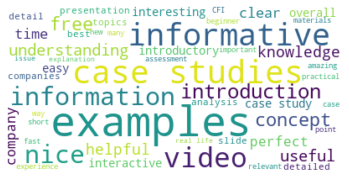

In [15]:
#High NPS(70.39)
word_cloud("Introduction to ESG")

Negative Comments: 4


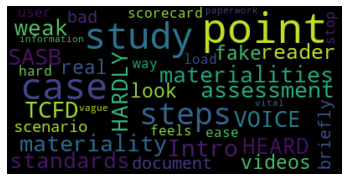

Positive Comments: 14


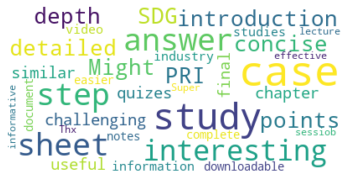

In [16]:
#LOW NPS(54.66)
word_cloud('ESG Disclosure')